In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sweetviz as sv
import dtale
import scipy.stats as stats

%matplotlib inline

In [2]:
# To display all columns:
pd.pandas.set_option('display.max_columns', None)

## Reading Data:

In [3]:
# For running in google colab:
# df = pd.read_csv(r'training.csv', na_values=-999.00)
# df_test = pd.read_csv(r'test.csv', na_values=-999.00)


# For reading Data from local system:
df = pd.read_csv(r'../data/raw/training.csv', na_values=-999.00)
df_test = pd.read_csv(r'../data/raw/test.csv', na_values=-999.00)

# Storing the event ids in variable
train_event_id, test_event_id = df['EventId'], df_test['EventId']

# Removing event ids from both dataframes
df.drop(columns='EventId', inplace=True)
df_test.drop(columns='EventId', inplace=True)

In [4]:
df.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,1.582,1.396,0.2,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,160.937,68.768,103.235,48.146,NaN,NaN,NaN,3.473,2.078,125.157,0.879,1.414,NaN,42.014,2.039,-3.011,36.918,0.501,0.103,44.704,-1.916,164.546,1,46.226,0.725,1.158,NaN,NaN,NaN,46.226,2.233584,b
2,NaN,162.172,125.953,35.635,NaN,NaN,NaN,3.148,9.336,197.814,3.776,1.414,NaN,32.154,-0.705,-2.093,121.409,-0.953,1.052,54.283,-2.186,260.414,1,44.251,2.053,-2.028,NaN,NaN,NaN,44.251,2.347389,b
3,143.905,81.417,80.943,0.414,NaN,NaN,NaN,3.310,0.414,75.968,2.354,-1.285,NaN,22.647,-1.655,0.010,53.321,-0.522,-3.100,31.082,0.060,86.062,0,NaN,NaN,NaN,NaN,NaN,NaN,-0.000,5.446378,b
4,175.864,16.915,134.805,16.405,NaN,NaN,NaN,3.891,16.405,57.983,1.056,-1.385,NaN,28.209,-2.197,-2.231,29.774,0.798,1.569,2.723,-0.871,53.131,0,NaN,NaN,NaN,NaN,NaN,NaN,0.000,6.245333,b


In [5]:
# Mapping values:

df['Label'] = df['Label'].map({'s': 1, 'b': 0})


In [6]:
# Dividing Datframe:
X_train = df.drop(columns=['Weight', 'Label'])
X_test= df_test

In [7]:
# Loding Data
df1 = pd.read_csv('../data/interim/train_MICE_median_ind.csv')
df1_test = pd.read_csv('../data/interim/test_MICE_median_ind.csv')
df1.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,ind_15,ind_40,ind_70,Weight,Label
0,138.47000,51.655,97.827,27.980,0.910000,124.711000,2.666000,3.064,41.928,197.760,1.582,1.396,0.200000,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2.0,67.435000,2.150000,0.444000,46.062000,1.240000,-2.475000,113.497,False,False,False,0.002653,1
1,160.93700,68.768,103.235,48.146,3.404602,456.387937,-2.262194,3.473,2.078,125.157,0.879,1.414,0.621629,42.014,2.039,-3.011,36.918,0.501,0.103,44.704,-1.916,164.546,1.0,46.226000,0.725000,1.158000,43.309039,0.271125,0.400691,46.226,False,False,True,2.233584,0
2,207.11754,162.172,125.953,35.635,2.760164,338.231864,-1.264787,3.148,9.336,197.814,3.776,1.414,0.558697,32.154,-0.705,-2.093,121.409,-0.953,1.052,54.283,-2.186,260.414,1.0,44.251000,2.053000,-2.028000,43.376340,-1.070836,0.732583,44.251,True,False,True,2.347389,0
3,143.90500,81.417,80.943,0.414,3.407340,477.658851,-2.081679,3.310,0.414,75.968,2.354,-1.285,0.617685,22.647,-1.655,0.010,53.321,-0.522,-3.100,31.082,0.060,86.062,0.0,43.781292,-0.452922,0.841083,42.313622,-0.333805,0.495673,-0.000,False,True,True,5.446378,0
4,175.86400,16.915,134.805,16.405,3.697092,512.224159,-2.519068,3.891,16.405,57.983,1.056,-1.385,0.606945,28.209,-2.197,-2.231,29.774,0.798,1.569,2.723,-0.871,53.131,0.0,42.013222,-0.199417,0.220767,38.810338,-0.208926,0.188463,0.000,False,True,True,6.245333,0


# Multicolinearity:

## Checking for high correlation in entire dataset (> 0.9 or < - 0.9):

In [8]:
# Define factor value
factor = 0.9

dfcorr = df1.corr() 
dfcorr1 = dfcorr[((dfcorr > factor) & (dfcorr<1.0)) | (dfcorr < -factor)]
dfcorr1.dropna(how='all', inplace=True)
dfcorr1.dropna(axis=1, how='all', inplace=True)
dfcorr1

,DER_mass_MMC,DER_mass_vis,DER_sum_pt,PRI_met_sumet,PRI_jet_all_pt
DER_mass_MMC,NaN,0.9275,NaN,NaN,NaN
DER_mass_vis,0.9275,NaN,NaN,NaN,NaN
DER_sum_pt,NaN,NaN,NaN,0.904481,0.965628
PRI_met_sumet,NaN,NaN,0.904481,NaN,NaN
PRI_jet_all_pt,NaN,NaN,0.965628,NaN,NaN


## Removing multicollinear features using manual method:

On analysis we find, removing `DER_mass_MMC` & `DER_sum_pt` is enough.

**Note:** `DER_mass_MMC` was having high correlation (`0.91`) with `DER_mass_vis` even before imputation, but at that point there was change of bias. But after imputation it is clear.

In [9]:
df2 = df1.drop(columns=['DER_mass_MMC', 'DER_sum_pt'])
df2_test = df1_test.drop(columns=['DER_mass_MMC', 'DER_sum_pt'])

In [10]:
# Define factor value
factor = 0.9

dfcorr = df2.corr() 
dfcorr1 = dfcorr[((dfcorr > factor) & (dfcorr<1.0)) | (dfcorr < -factor)]
dfcorr1.dropna(how='all', inplace=True)
dfcorr1.dropna(axis=1, how='all', inplace=True)
dfcorr1

""


## Variance Inflation Factor:

In [11]:
# !pip install statsmodels

In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# 'PRI_jet_all_pt', 'PRI_lep_pt'

In [13]:
# It cannot handle categorical data & boolean data:
Xnew = df2.drop(columns=['ind_15', 'ind_40', 'ind_70'])

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = Xnew.columns

In [14]:
# vif_data["feature"]

In [15]:
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(Xnew.values, i) for i in range(Xnew.shape[1])]
  
np.round(vif_data.sort_values(by='VIF', ascending=False), 2)

,feature,VIF
27,PRI_jet_all_pt,61.81
3,DER_deltaeta_jet_jet,60.87
21,PRI_jet_leading_pt,42.85
6,DER_deltar_tau_lep,31.07
14,PRI_lep_pt,29.43
24,PRI_jet_subleading_pt,23.62
19,PRI_met_sumet,23.60
4,DER_mass_jet_jet,23.20
8,DER_pt_ratio_lep_tau,21.33
2,DER_pt_h,19.24


In [17]:
# df2.corr()

## Data Vizualization using Dtale:

In [8]:
import dtale

# Displays directly in jupyter notebook:
# dtale.show(df, ignore_duplicate=True)
# dtale.show(pd.DataFrame([1,2,3]), app_root='/user/johndoe/proxy/40000/`)


d = dtale.show(df2)


# Altering data associated with D-Tale process
# FYI: this will clear any front-end settings you have at the time for this process (filter, sorts, formatting)
# d.data = tmp

# Shutting down D-Tale process
# d.kill()

# using Python's `webbrowser` package it will try and open your server's default browser to this process
d.open_browser()

d._main_url # /user/johndoe/proxy/40000/dtale/main/1

# d

'http://HP_DEEPANKAR:40000/dtale/main/1'

# Transforming Data to Normal Distribution:

**Note**: Since the data is not normally distributed, StandardScalar, MinMaxScaler, RobustScaler, MaxScaler will not be usefull.

## MissingIndicator:

In [18]:
from sklearn.impute import MissingIndicator

In [19]:
## With Indicator column:
mi = MissingIndicator(sparse=False)
train_temp_ind = mi.fit_transform(X_train[['DER_mass_MMC', 'PRI_jet_leading_pt', 'DER_deltaeta_jet_jet']])
test_temp_ind = mi.transform(X_test[['DER_mass_MMC', 'PRI_jet_leading_pt', 'DER_deltaeta_jet_jet']])

## PowerTransformer:

In [20]:
from sklearn.preprocessing import PowerTransformer

In [21]:
# Transformer
pt = PowerTransformer(method='yeo-johnson')

# Training set
train_temp = pd.DataFrame(pt.fit_transform(df2.iloc[:, :-5]), 
                         columns=df2.columns[:-5])

# Test set
test_temp = pd.DataFrame(pt.transform(df2_test.iloc[:, :-3]), 
                         columns=df2_test.columns[:-3])

train_temp[['ind_15', 'ind_40', 'ind_70']] = train_temp_ind
test_temp[['ind_15', 'ind_40', 'ind_70']] = test_temp_ind
train_temp[['Weight', 'Label']] = df2[['Weight', 'Label']]

# Save data
train_temp.to_csv('../data/interim/train_MICE_median_ind_PowerTransformer.csv', index=False)
test_temp.to_csv('../data/interim/test_MICE_median_ind_PowerTransformer.csv', index=False)

In [22]:
#EDA using Autoviz
sweet_report = sv.analyze(train_temp)

#Saving results to HTML file
# sweet_report.show_html("/content/drive/MyDrive/HR Analytics EDA Analysis/output_sweetViz.html")  // for drive
# sweet_report.show_html("../reports/op_sv_PowerTransformer.html")

# Open the following URL in browser to see report:
# file:///C:/Users/DEEPANKAR%20MULLICK/Desktop/higgs_boson/reports/op_sv_PowerTransformer.html

                                             |                                             | [  0%]   00:00 ->…

Report ../reports/op_sv_PowerTransformer.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## QuantileTransformer:

In [23]:
from sklearn.preprocessing import QuantileTransformer

In [24]:
# Transformer
qt = QuantileTransformer(output_distribution='normal')


# Training set
train_temp = pd.DataFrame(qt.fit_transform(df2.iloc[:, :-5]), 
                          columns=df2.columns[:-5])


# Test set
test_temp = pd.DataFrame(qt.transform(df2_test.iloc[:, :-3]) , columns=df2_test.columns[:-3])

train_temp[['ind_15', 'ind_40', 'ind_70']] = train_temp_ind
test_temp[['ind_15', 'ind_40', 'ind_70']] = test_temp_ind
train_temp[['Weight', 'Label']] = df2[['Weight', 'Label']]

# Save data
train_temp.to_csv('../data/interim/train_MICE_median_ind_QuantileTransformer.csv', index=False)
test_temp.to_csv('../data/interim/test_MICE_median_ind_QuantileTransformer.csv', index=False)

In [25]:
#EDA using Autoviz
sweet_report = sv.analyze(train_temp)

#Saving results to HTML file
# sweet_report.show_html("/content/drive/MyDrive/HR Analytics EDA Analysis/output_sweetViz.html")  // for drive
# sweet_report.show_html("../reports/op_sv_QuantileTransformer.html")

# Open the following URL in browser to see report:
# file:///C:/Users/DEEPANKAR%20MULLICK/Desktop/higgs_boson/reports/op_sv_QuantileTransformer.html

                                             |                                             | [  0%]   00:00 ->…

Report ../reports/op_sv_QuantileTransformer.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# Outlier detection & Removal:

In [19]:
df3 = pd.read_csv('../data/interim/train_MICE_median_ind_QuantileTransformer.csv')
df3_test = pd.read_csv('../data/interim/test_MICE_median_ind_QuantileTransformer.csv')

In [30]:
df3.describe()

,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,-0.000648,-0.004368,0.001549,-0.005261,-0.002547,-0.000199,0.001882,-0.000093,0.000052,-0.043226,-0.206398,-0.000583,0.003040,-0.001809,-0.003341,0.005651,-0.002295,-0.000415,-0.003185,0.001900,-1.397283,-0.000837,0.004165,-0.001293,-0.001781,-0.003799,0.001516,-1.693935,1.646767,0.342668
std,0.997892,0.996830,0.997518,0.996961,0.996343,0.999247,1.001362,1.000934,0.998315,1.644517,1.550873,0.998810,0.999565,1.001228,1.000761,0.998176,0.999202,0.998632,1.001104,0.998707,3.377822,0.999697,1.003230,1.000967,0.996921,1.001412,1.000104,2.903776,1.875103,0.474603
min,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,0.001502,0.000000
25%,-0.672093,-0.677323,-0.669638,-0.679982,-0.676949,-0.675031,-0.675277,-0.674962,-0.673702,-0.665852,-0.679692,-0.673112,-0.673702,-0.673702,-0.680716,-0.673702,-0.676223,-0.673348,-0.679539,-0.672983,-5.199338,-0.674959,-0.674976,-0.681288,-0.673912,-0.677424,-0.672968,-5.199338,0.018636,0.000000
50%,0.000975,-0.003731,0.002087,-0.003907,-0.001879,0.004768,0.001673,0.000888,-0.001255,0.007946,-0.000111,0.001407,0.005646,0.000836,-0.005974,0.005269,-0.001255,-0.004211,-0.005198,0.001917,0.137177,-0.000834,0.006063,0.000262,-0.003844,-0.005123,-0.000177,-0.004890,1.156188,0.000000
75%,0.672951,0.666382,0.671403,0.668770,0.668207,0.670758,0.678433,0.675871,0.673702,0.680013,0.676791,0.670177,0.676854,0.672916,0.675118,0.678117,0.671081,0.673203,0.672129,0.676267,0.879040,0.674280,0.684535,0.673253,0.674493,0.671219,0.675188,0.671490,2.404128,1.000000
max,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,7.822543,1.000000


In [67]:
cols = ['DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_pt_h',
       'DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet',
       'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_pt_ratio_lep_tau', 'PRI_tau_pt',
       'PRI_tau_eta', 'PRI_tau_phi', 'PRI_lep_pt', 'PRI_lep_eta',
       'PRI_lep_phi', 'PRI_met', 'PRI_met_phi', 'PRI_met_sumet', 
       'PRI_jet_leading_pt', 'PRI_jet_leading_eta', 'PRI_jet_leading_phi',
       'PRI_jet_subleading_pt', 'PRI_jet_subleading_eta',
       'PRI_jet_subleading_phi', 'PRI_jet_all_pt', 'Weight']

In [68]:
thr = 3
outliers_ind = np.array([])
for i in cols:
    mean = df3[i].mean()
    std = df3[i].std()
    lb = mean - thr*std
    ub = mean + thr*std
    outliers = df3[ (df3[i]<lb) | (df3[i]>ub)] [[i]]
    outliers_ind = np.append(outliers_ind, outliers.index)
    print(outliers)
    print('Length -', len(outliers))
    

        DER_mass_transverse_met_lep
219                       -3.157208
610                       -3.632126
631                        3.085956
961                       -3.200006
2449                      -3.014270
...                             ...
246777                     3.243712
246795                    -3.020802
247841                     3.127342
247985                    -3.382475
248021                    -3.348652

[673 rows x 1 columns]
Length - 673
        DER_mass_vis
360        -3.095443
1361       -3.174186
1388       -3.144413
1703       -3.052569
1777       -3.061482
...              ...
248705      3.105240
249574     -3.096923
249680     -3.014397
249757     -3.016021
249992      3.219153

[666 rows x 1 columns]
Length - 666
        DER_pt_h
347    -3.097543
414     3.090261
453    -2.995781
462     3.097816
767    -3.039499
...          ...
248200  3.100585
248679 -5.199338
249440 -3.395822
249615 -5.199338
249891 -3.190730

[617 rows x 1 columns]
Length - 617
 

In [82]:
dropping = np.unique(outliers_ind)

In [83]:
df4 = df3.drop(index=dropping)

In [87]:
# Save data
df4.to_csv('../data/interim/train_MICE_med_ind_QT_dropOutlier.csv', index=False)

## Visualizing Data before & after dropping outliers:

In [81]:
cols = ['DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_pt_h',
       'DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet',
       'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_pt_ratio_lep_tau', 'PRI_tau_pt',
       'PRI_tau_eta', 'PRI_tau_phi', 'PRI_lep_pt', 'PRI_lep_eta',
       'PRI_lep_phi', 'PRI_met', 'PRI_met_phi', 'PRI_met_sumet', 
       'PRI_jet_leading_pt', 'PRI_jet_leading_eta', 'PRI_jet_leading_phi',
       'PRI_jet_subleading_pt', 'PRI_jet_subleading_eta',
       'PRI_jet_subleading_phi', 'PRI_jet_all_pt', 'Weight']

In [79]:
def viz(df, features=df.columns):
    sns.set_style('dark')
    for col in features:
        plt.figure(figsize=(15,4))
        plt.subplot(131)
        sns.histplot(data=df, x=col, label="skew: " + str(np.round(df[col].skew(),2)))
        plt.legend()
        plt.subplot(132)
        sns.boxplot(data=df ,x=col)
        plt.subplot(133)
        stats.probplot(df[col], plot=plt)
        plt.tight_layout()
        plt.show()

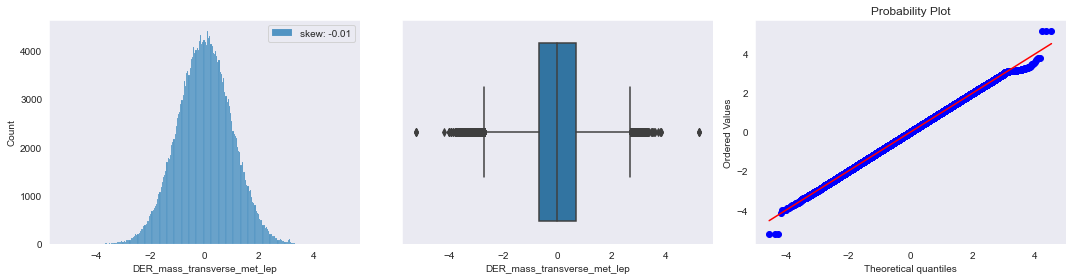

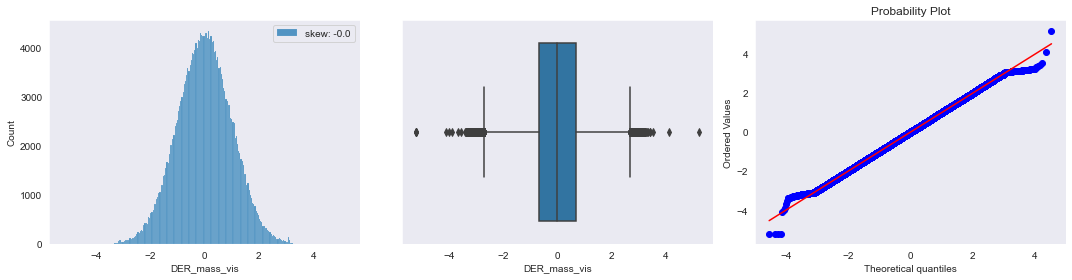

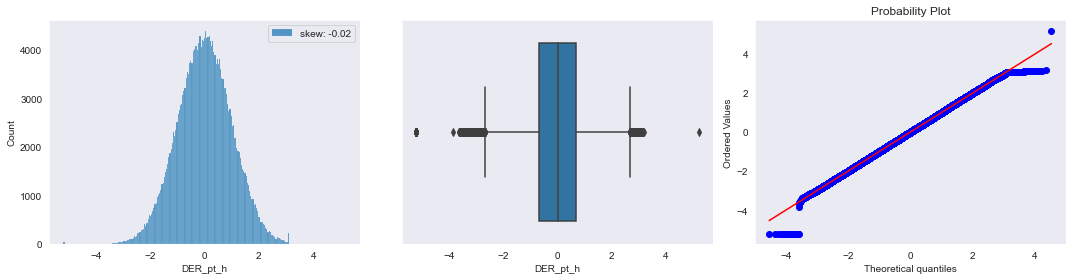

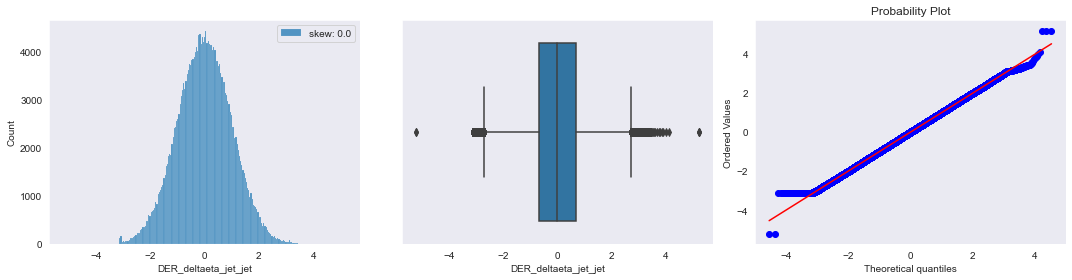

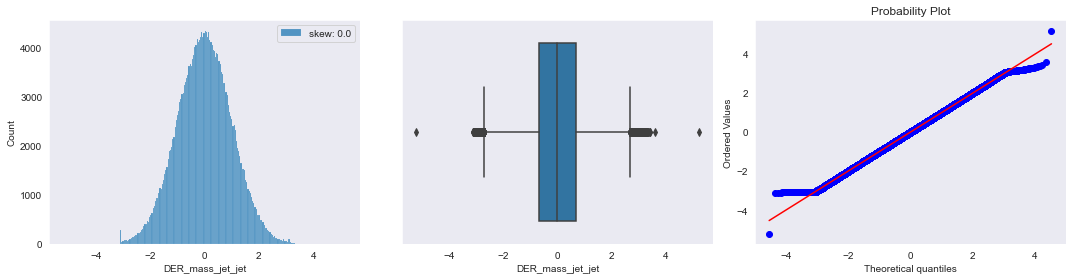

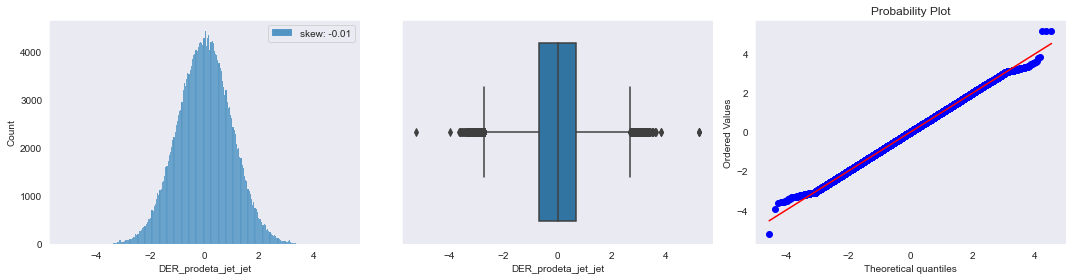

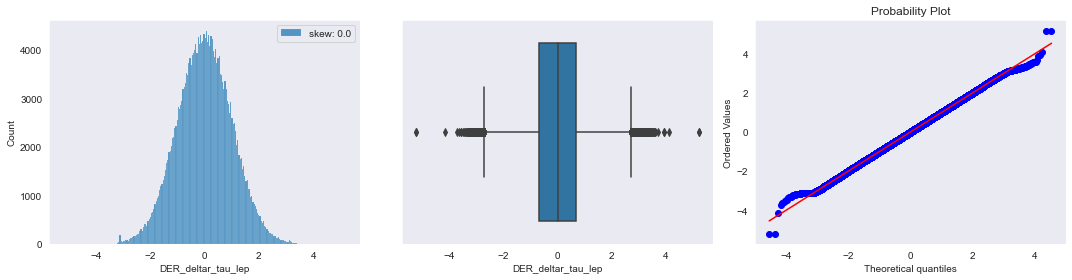

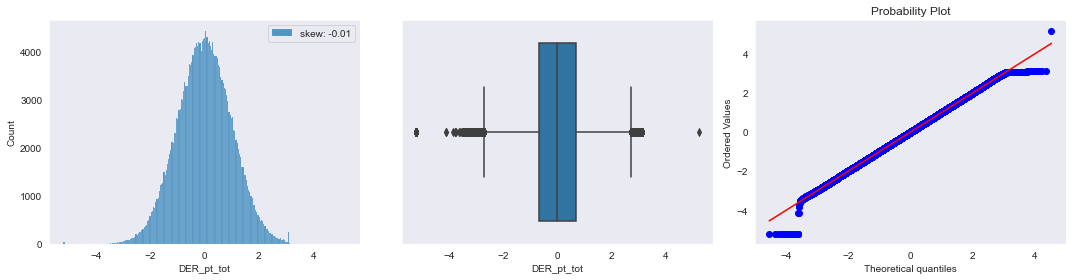

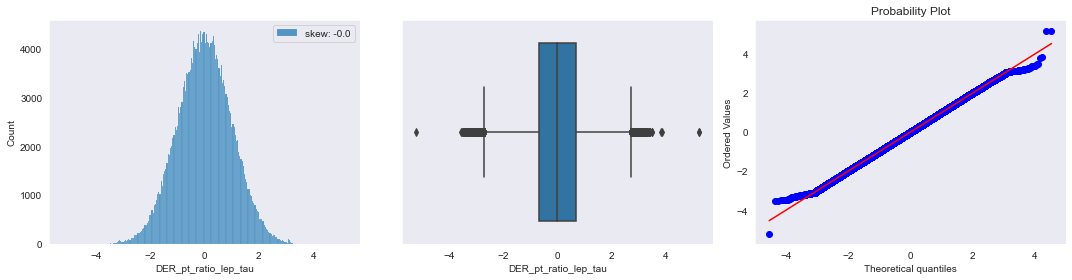

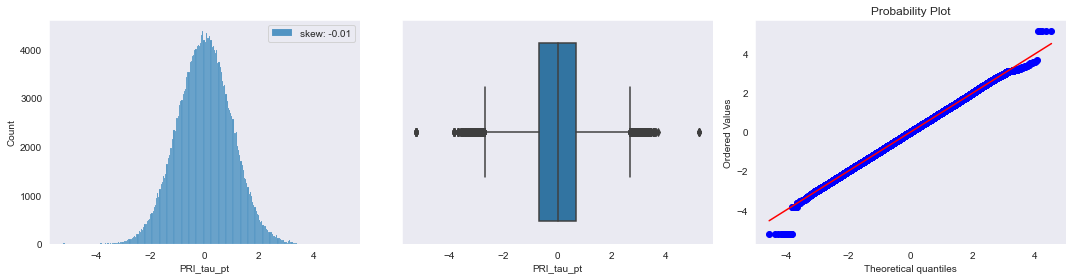

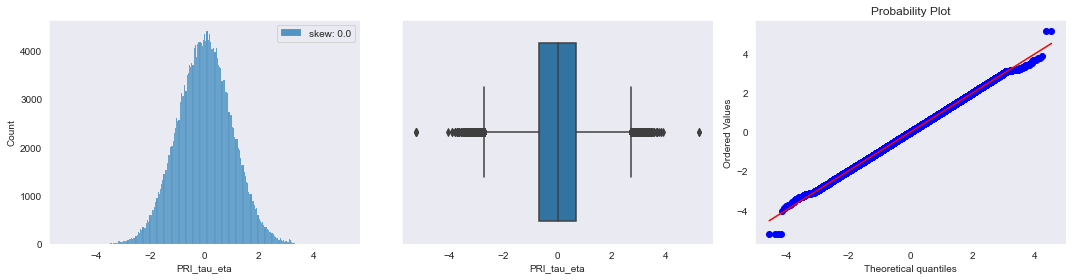

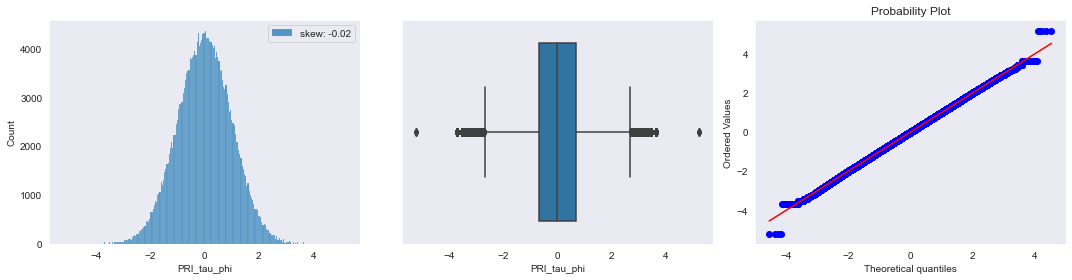

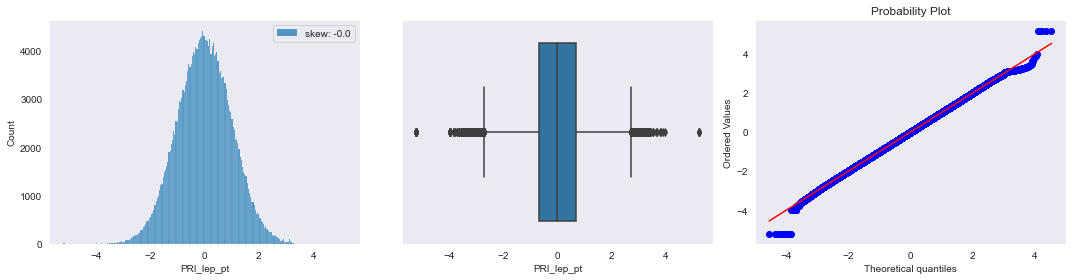

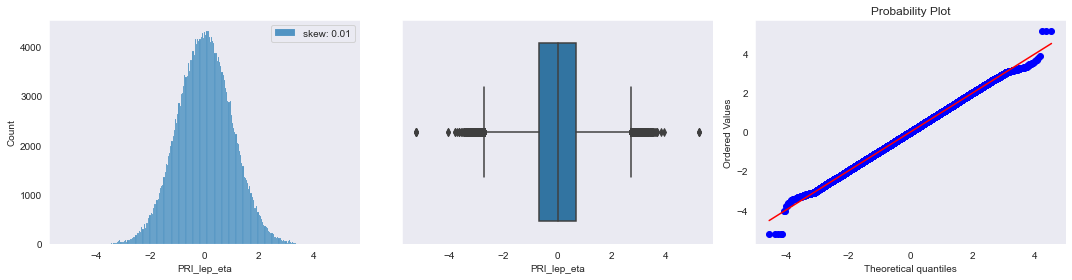

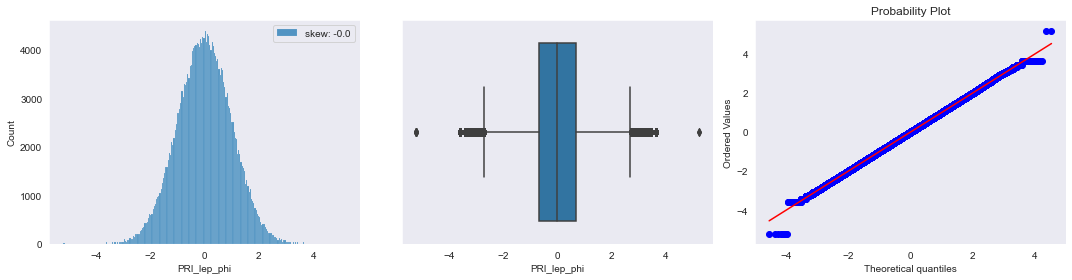

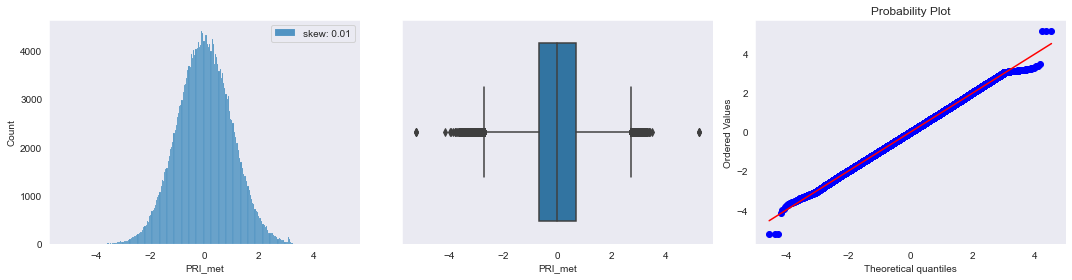

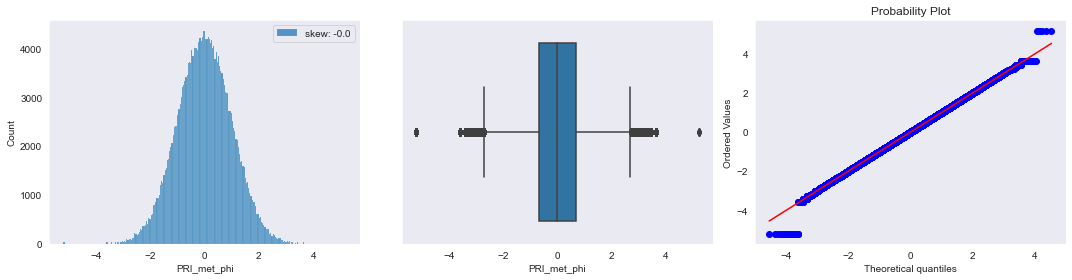

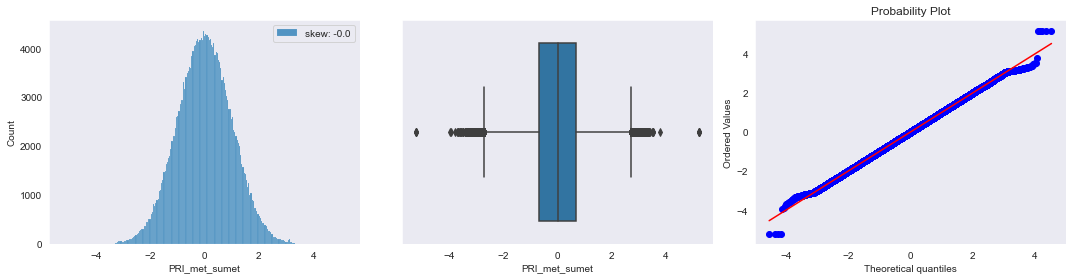

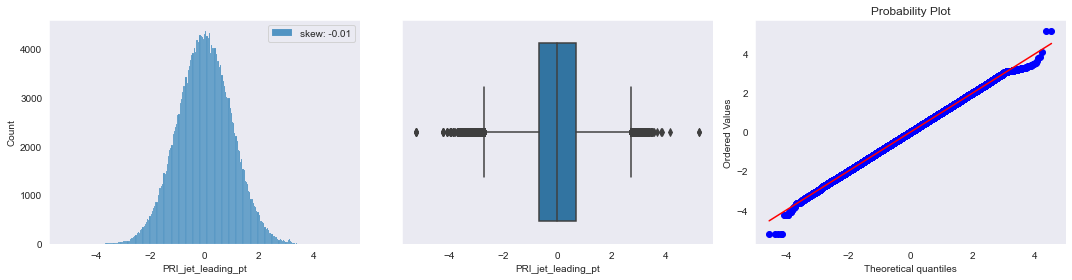

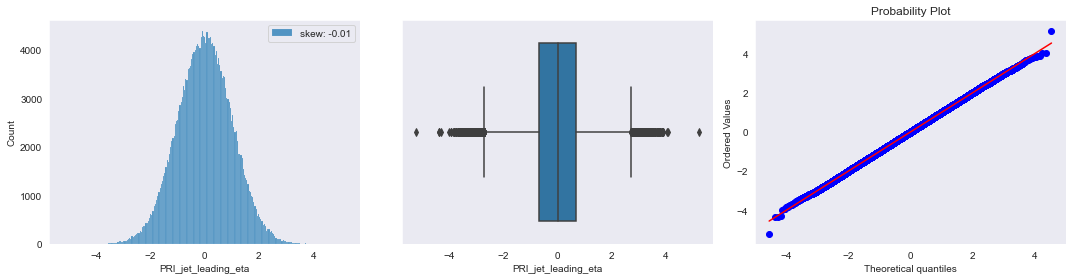

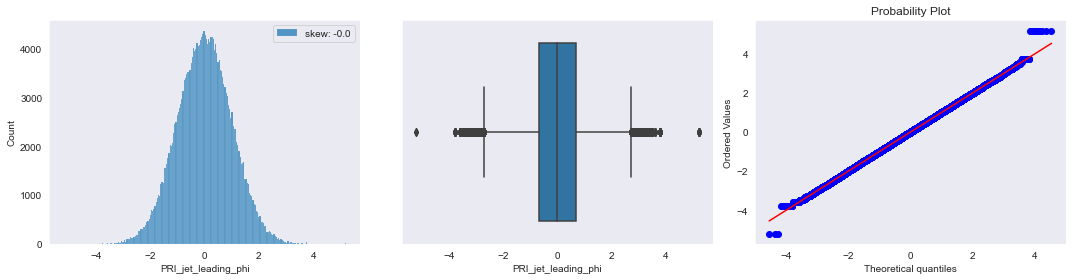

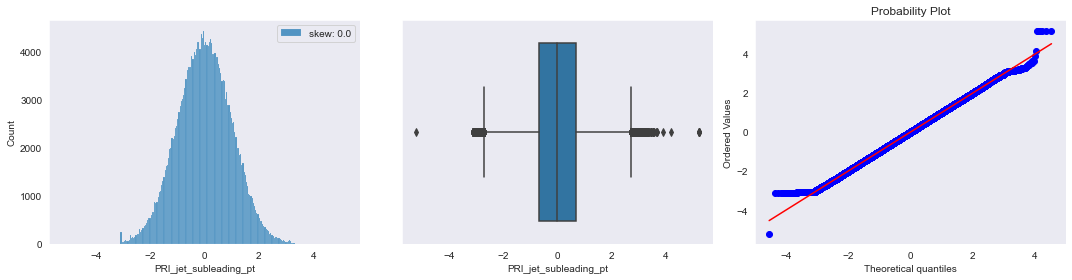

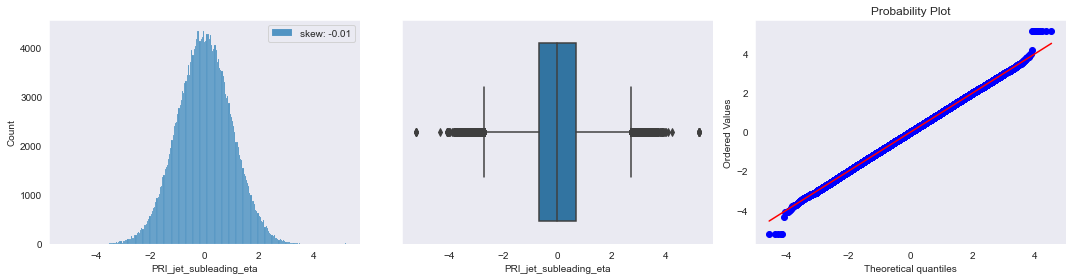

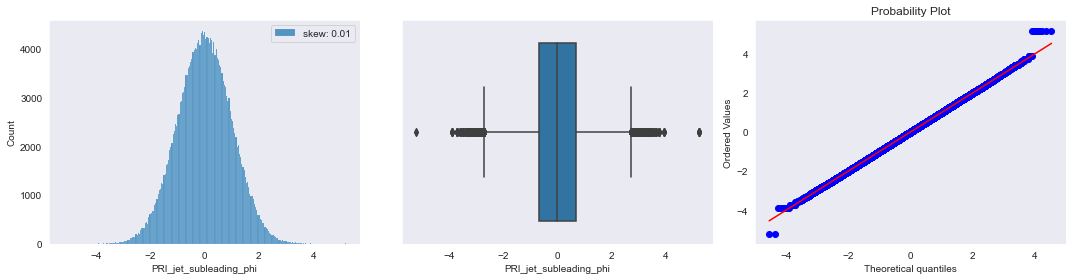

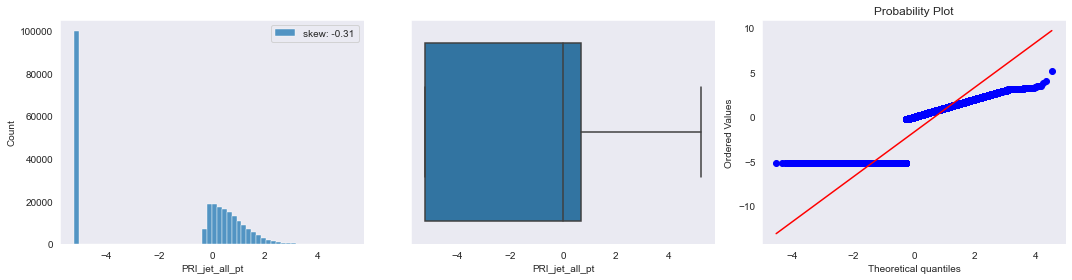

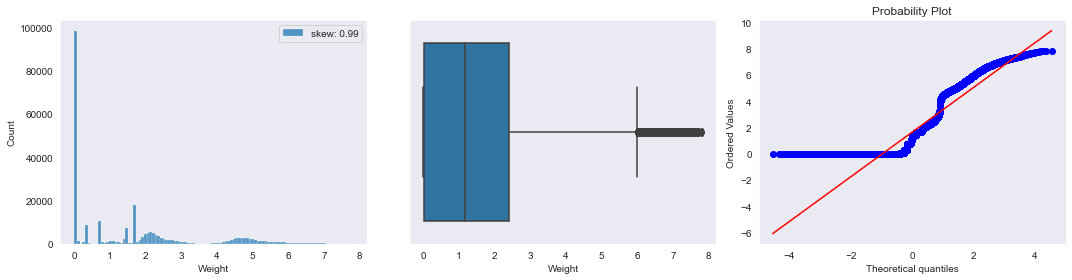

In [80]:
viz(df3, cols)

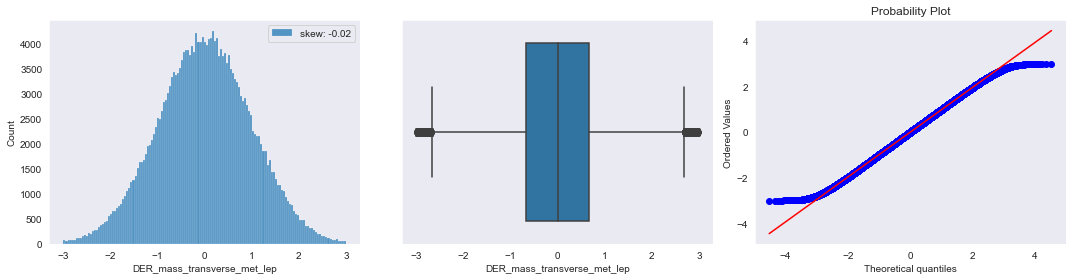

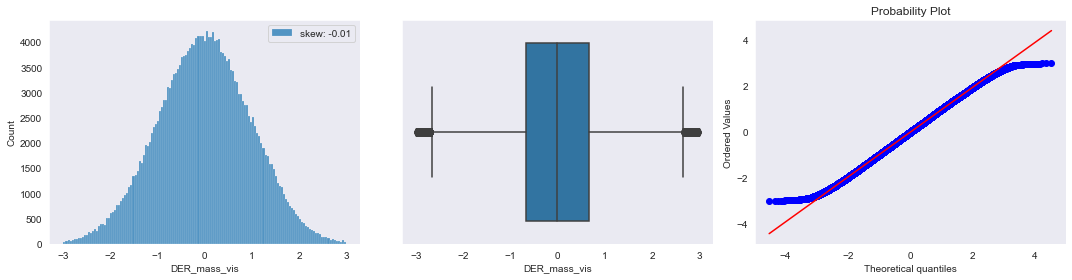

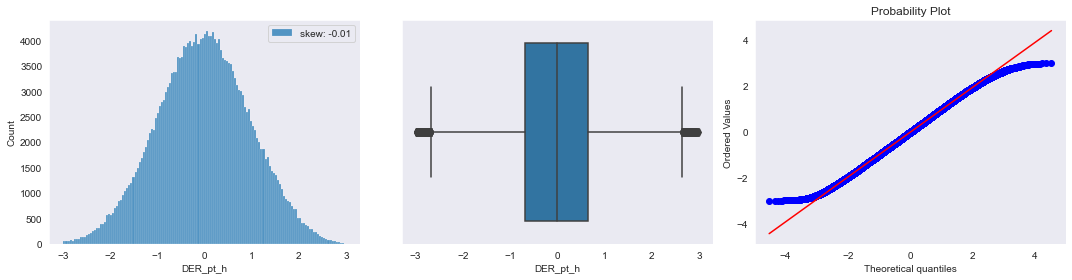

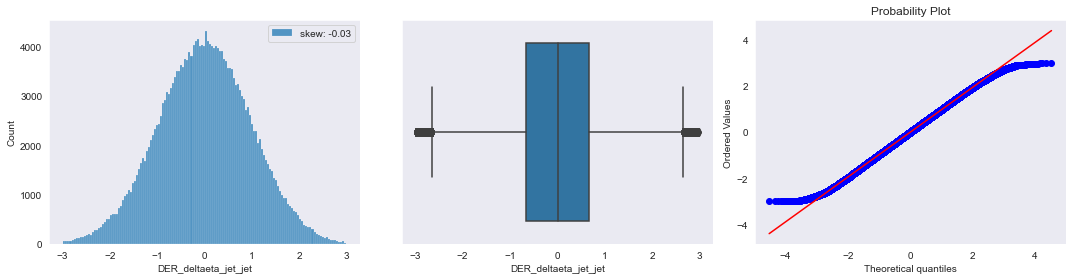

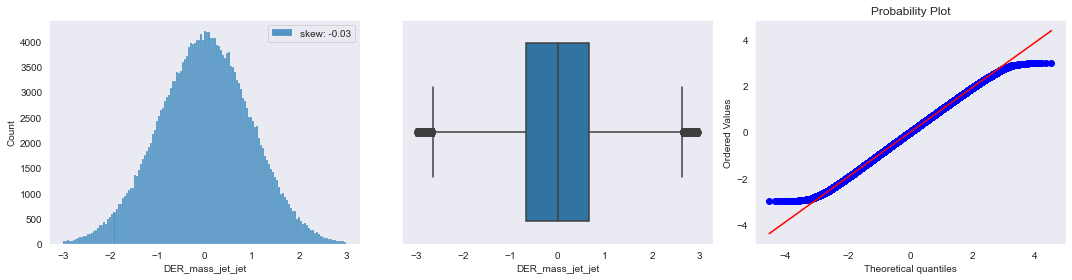

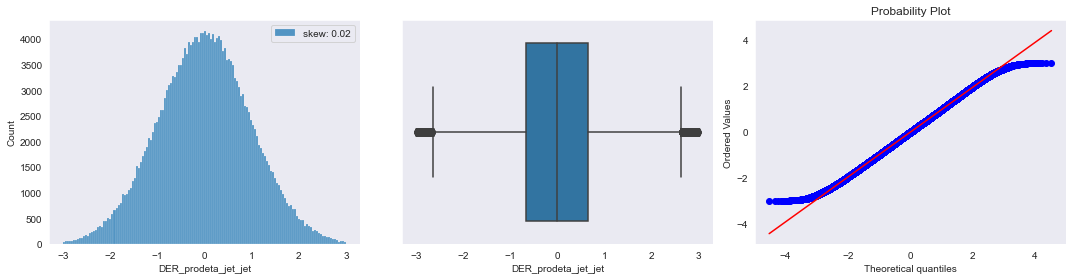

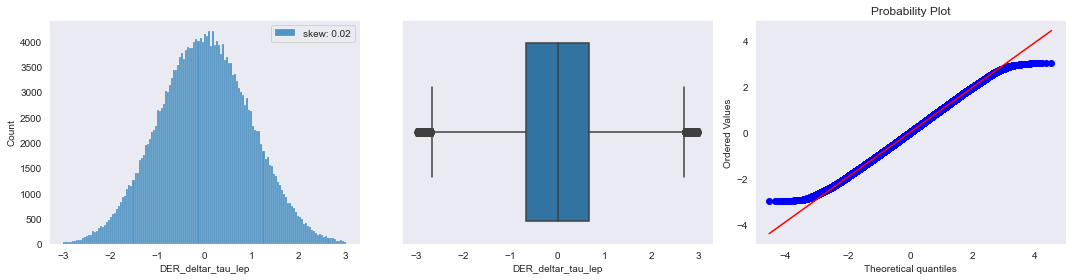

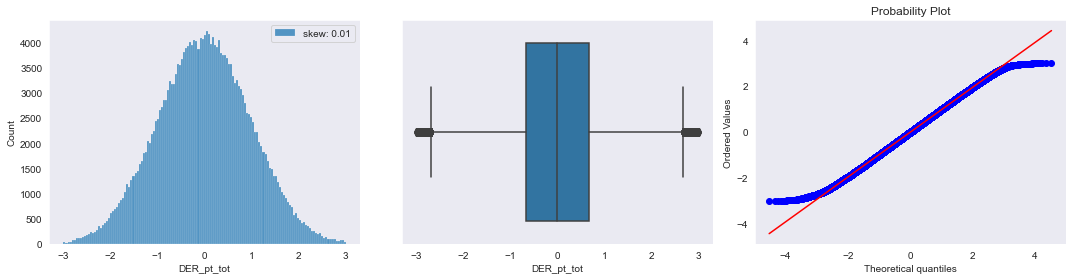

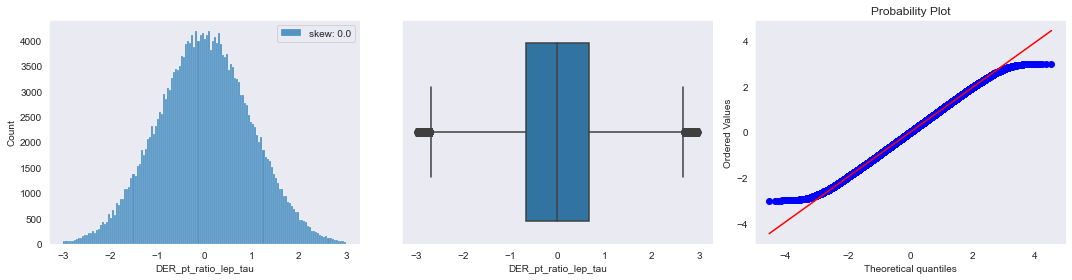

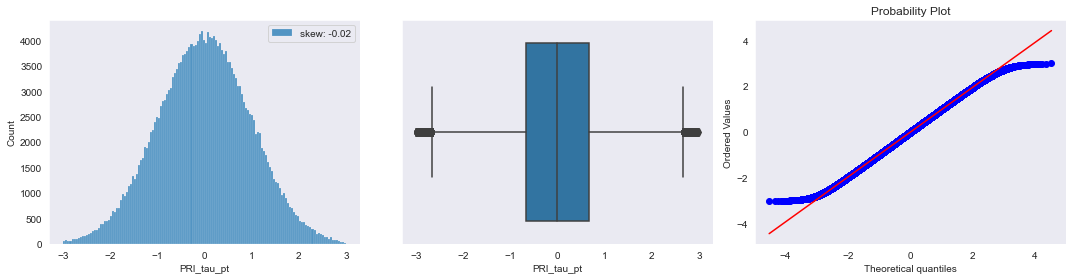

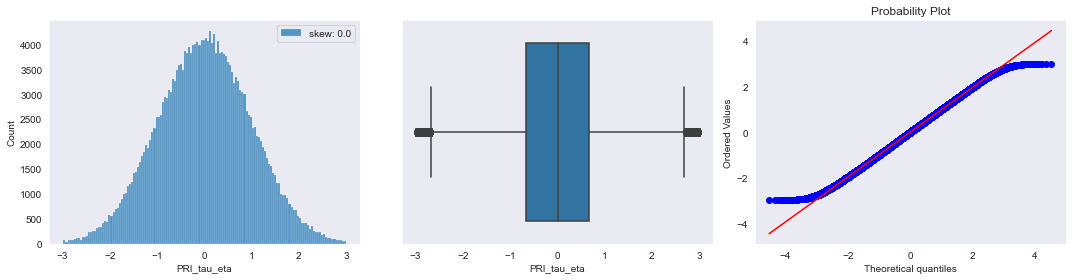

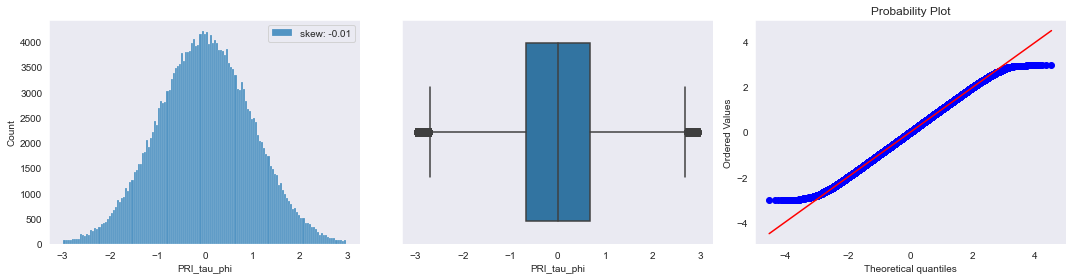

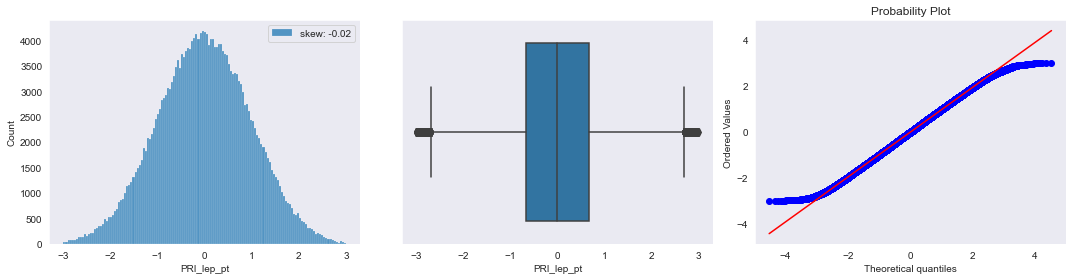

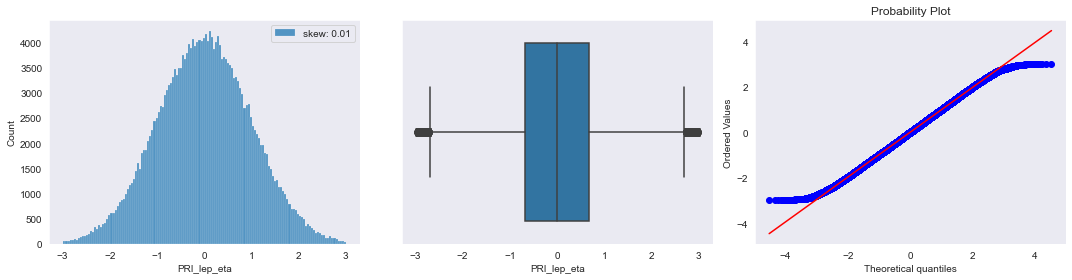

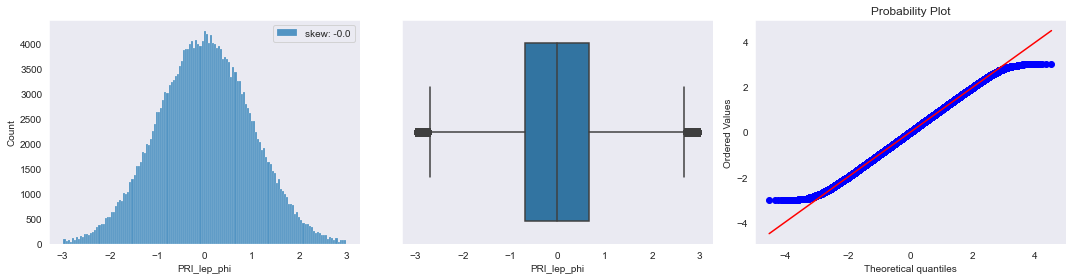

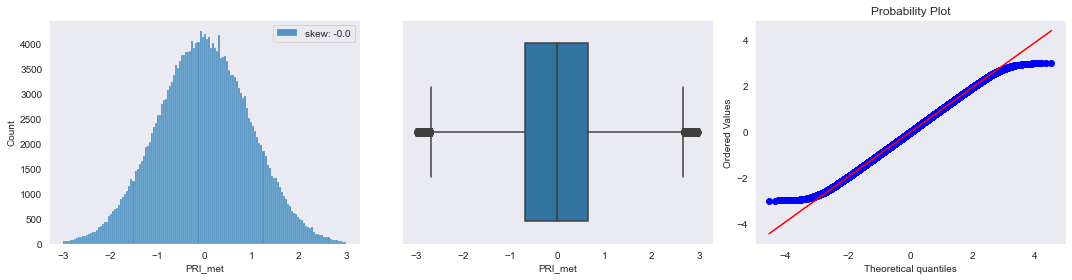

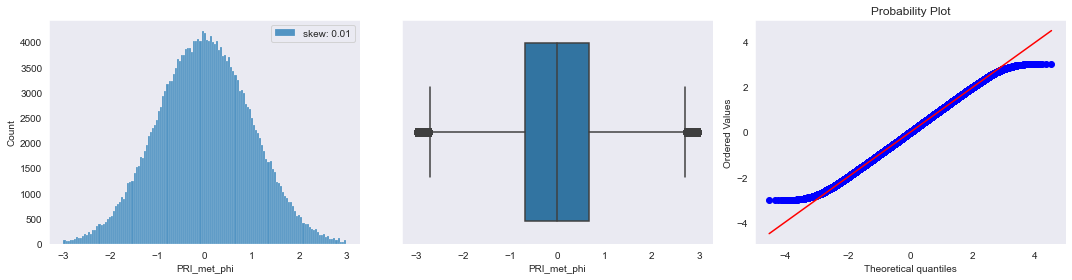

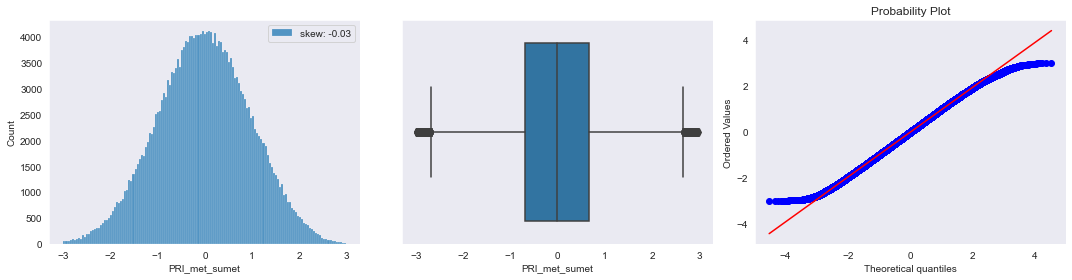

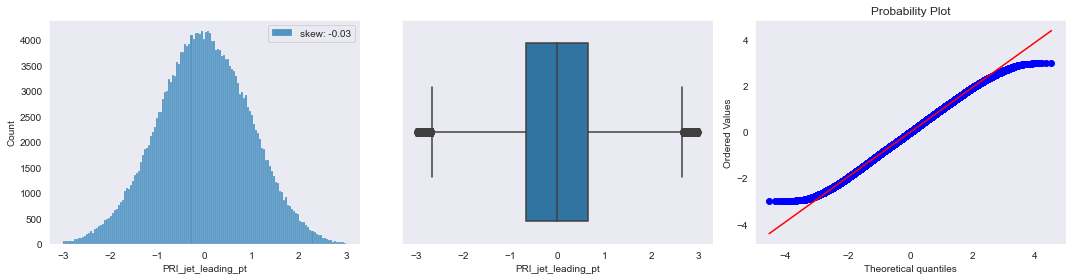

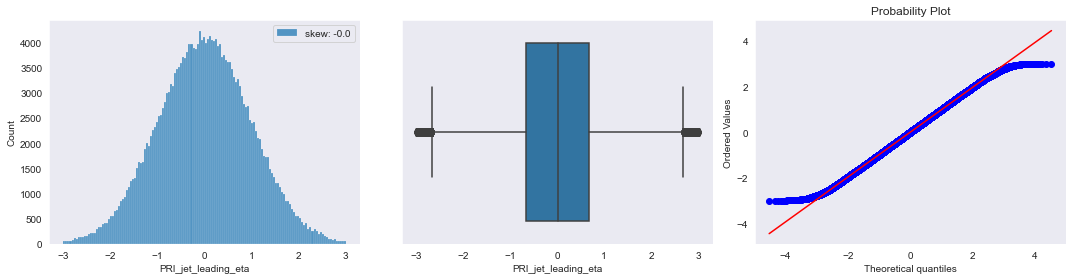

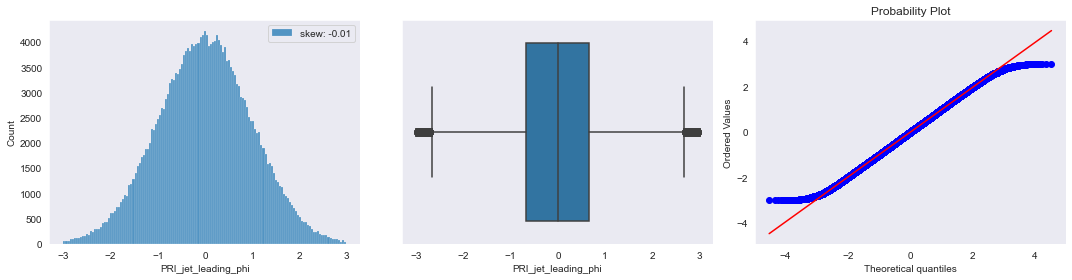

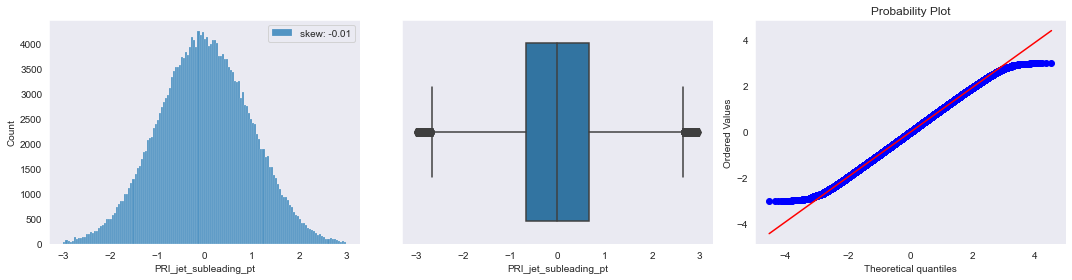

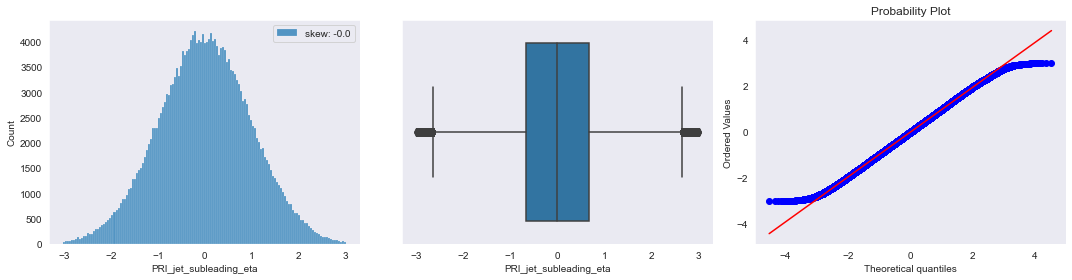

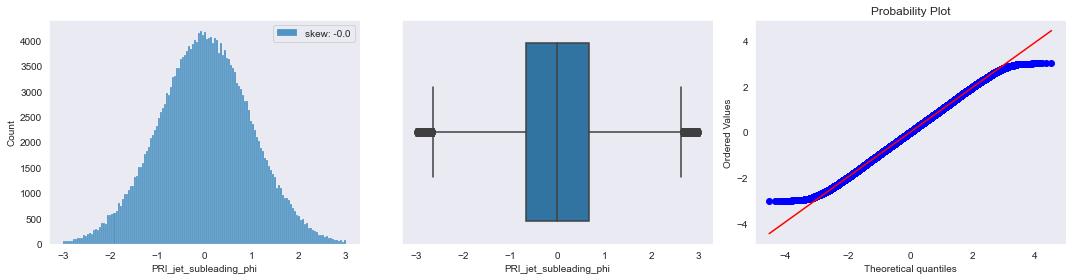

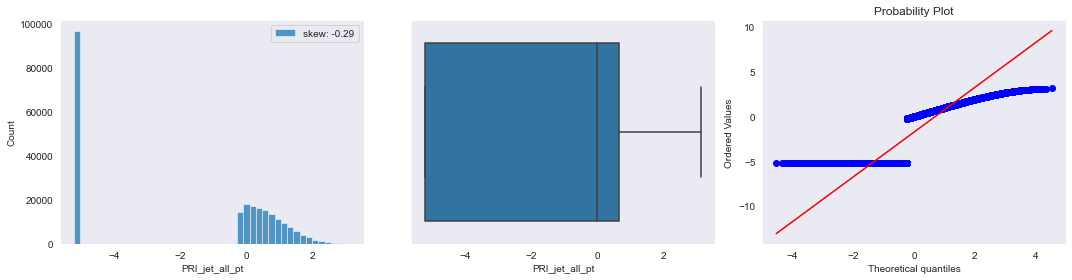

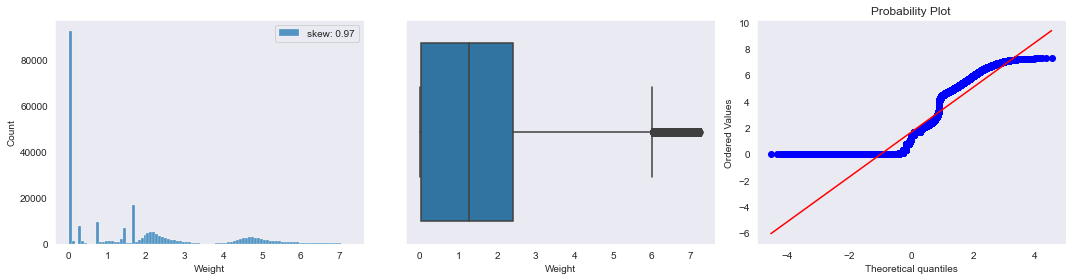

In [84]:
viz(df4, cols)